In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose  #계절성, 추세, 전차 분해하는 기능 제공하는 패키지 함수
from statsmodels.graphics.tsaplots import plot_acf       #자기 상관 패키지 함수

<h1 style="color: blue;">다. 시계열 데이터</h1>

## 목차
1. 시계열 데이터
2. 시각화
3. 데이터 전처리
4. 이상치
5. 정규화와 변환 방법
6. 시계열 모델링 기본 개념

## 1. 시계열 데이터

+ 시간 의존성(Time Dependency): 시계열 데이터는 시간에 따라 변화하는 경향이 있습니다. 이전의 값은 이후의 값에 영향을 줄 수 있고, 현재의 값은 과거의 값에 의존할 수 있습니다. 시간적인 연관성이 존재 하므로, 시계열 데이터를 분석할 때는 이러한 의존성을 고려해야 합니다.
<br></br>
+ 계절성(Seasonality): 일정한 주기를 가지며 반복되는 패턴이 나타날 수 있습니다. 예를 들어, 매년 같은 시기에 판매량이 증가하는 경향이 있는 경우 해당 계절성 패턴을 분석할 수 있습니다.
<br></br>
+ 추세(Trend): 시계열 데이터에는 장기적인 추세가 존재할 수 있습니다. 추세는 시간에 따라 증가하거나 감소하는 경향을 나타냅니다. 추세를 파악하면 미래의 동향을 예측하는 데 도움이 될 수 있습니다.
<br></br>
+ 자기 상관성(Autocorrelation): 시계열 데이터에서는 시간적으로 인접한 관측값들 사이에 상관 관계가 있을 수 있습니다. 이전 시간대의 값이 현재 시간대의 값에 영향을 줄 수 있습니다. 자기 상관성을 분 석하면 데이터의 패턴을 이해하고 예측하는 데 도움이 됩니다.
<br></br>
+ 불규칙성(Irregularity): 시계열 데이터에는 예측할 수 없는 불규칙한 변동이 존재할 수 있습니다. 외부 요인이나 잡음에 의해 데이터에 불규칙성이 발생할 수 있으며, 이를 고려하여 모델링해야 합니다.

### *시계열의 각 특성에 대한 간단한 실습*

In [44]:
#시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=1000, freq='D')
values = np.random.randn(1000)

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)

          Date     Value
0   2023-01-01  0.496714
1   2023-01-02 -0.138264
2   2023-01-03  0.647689
3   2023-01-04  1.523030
4   2023-01-05 -0.234153
5   2023-01-06 -0.234137
6   2023-01-07  1.579213
7   2023-01-08  0.767435
8   2023-01-09 -0.469474
9   2023-01-10  0.542560
10  2023-01-11 -0.463418
11  2023-01-12 -0.465730
12  2023-01-13  0.241962
13  2023-01-14 -1.913280
14  2023-01-15 -1.724918
15  2023-01-16 -0.562288
16  2023-01-17 -1.012831
17  2023-01-18  0.314247
18  2023-01-19 -0.908024
19  2023-01-20 -1.412304
20  2023-01-21  1.465649
21  2023-01-22 -0.225776
22  2023-01-23  0.067528
23  2023-01-24 -1.424748
24  2023-01-25 -0.544383
25  2023-01-26  0.110923
26  2023-01-27 -1.150994
27  2023-01-28  0.375698
28  2023-01-29 -0.600639
29  2023-01-30 -0.291694
30  2023-01-31 -0.601707
31  2023-02-01  1.852278
32  2023-02-02 -0.013497
33  2023-02-03 -1.057711
34  2023-02-04  0.822545
35  2023-02-05 -1.220844
36  2023-02-06  0.208864
37  2023-02-07 -1.959670
38  2023-02-08 -1.328186


In [45]:
#데이터 프레임을 CSV 저장
data.to_csv("./data/sample_time_data.csv", index=False, encoding="utf-8")

#저장한 CSV 파일 읽기
data = pd.read_csv("./data/sample_time_data.csv", parse_dates=['Date'], index_col='Date')

#parse_dates=['Date']  : 
#"Date" 열의 데이터를 날짜/시간 형식으로 파싱합니다. "Date" 열의 값은 CSV 파일에서 날짜/시간 형식으로 표현되어야 합니다. 이렇게 파싱된 날짜/시간 정보는 나중에 시계열 데이터의 인덱스로 사용됩니다.

#index_col :  
#"Date" 열을 시계열 데이터의 인덱스로 설정합니다. 이렇게 설정된 인덱스는 시계열 데이터의 특정 날짜/시간에 대한 접근과 시계열 연산을 용이하게 합니다.

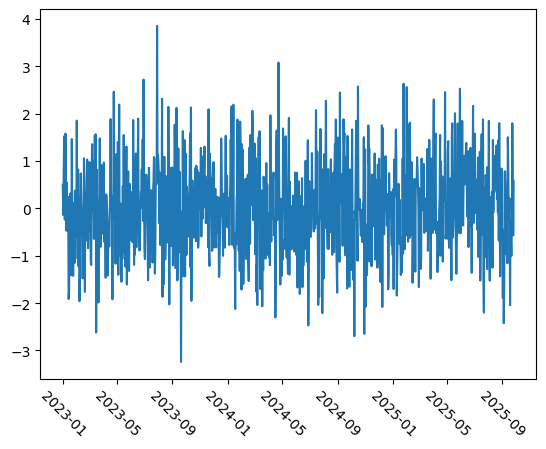

In [46]:
#시각화
plt.plot(data.index, data['Value'])
plt.xticks(rotation=-45)
plt.show()

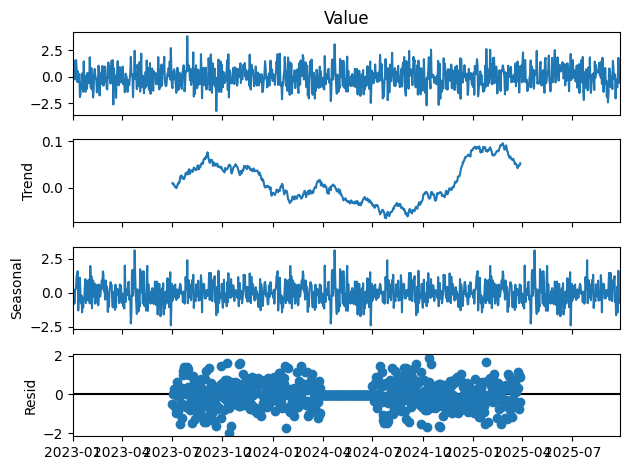

In [47]:
#추세 분석
result = seasonal_decompose(data['Value'], model='additive', period=365)
#model='additive' 매개변수는 계절성과 추세를 덧셈 모델로 분해하겠다는 의미입니다. 다른 옵션으로는 'multiplicative' 모델을 선택할 수도 있습니다.
result.plot()
plt.show()

#2 번째 그래프는 추세 그래프
#3 번째 그래프는 계절성 성분을 보여주는 그래프 period는 365
#4 번째 그래피는 잔차 성분을 보여준다. 추세와 계절성을 제외한 나머지 변동 요소를 나타낸다.

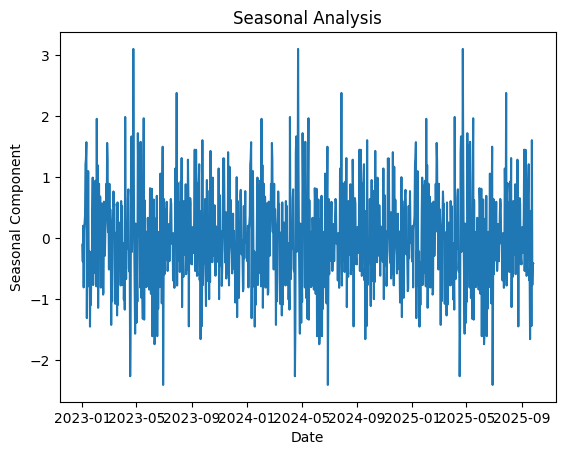

In [48]:
# 계절성 분석
seasonal_component = result.seasonal
plt.plot(seasonal_component)
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Analysis')
plt.show()

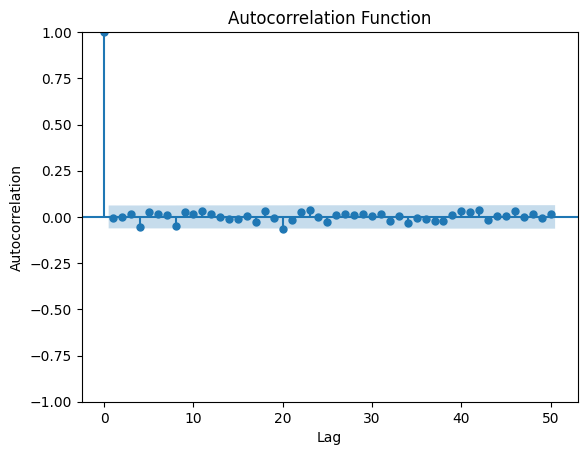

In [49]:
#자기 상관성 분석
plot_acf(data['Value'], lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.show()

## 2. 시각화

### *시계열 데이터의 구성요소*
+ 상향 추세(Upward Trend): 데이터가 시간이 지남에 따라 점진적으로 증가하는 추세를 나타냅니다. 이는 긍정적인 경향을 나타내며, 예를 들어 경제 성장이나 기업의 매출 증가와 같은 상황에서 관찰 가능
<br></br>
+ 하향 추세(Downward Trend): 데이터가 시간이 지남에 따라 점진적으로 감소하는 추세를 나타냅니다. 이는 부정적인 경향을 나타내며, 예를 들어 경기 하락이나 제품의 판매량 감소와 같은 상황에서 관찰 될 수 있습니다.
<br></br>
+ 평평한 추세(Flat Trend): 데이터가 시간이 지남에 따라 큰 변동 없이 상대적으로 일정한 수준을 유지하는 추세를 나타냅니다. 이는 안정적인 상태를 나타내며, 예를 들어 안정적인 시장에서의 가격 변동이나 일 정한 생산량을 유지하는 기업에서 관찰될 수 있습니다.

In [50]:
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100).cumsum()

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)

         Date      Value
0  2023-01-01   0.496714
1  2023-01-02   0.358450
2  2023-01-03   1.006138
3  2023-01-04   2.529168
4  2023-01-05   2.295015
5  2023-01-06   2.060878
6  2023-01-07   3.640091
7  2023-01-08   4.407525
8  2023-01-09   3.938051
9  2023-01-10   4.480611
10 2023-01-11   4.017193
11 2023-01-12   3.551464
12 2023-01-13   3.793426
13 2023-01-14   1.880146
14 2023-01-15   0.155228
15 2023-01-16  -0.407060
16 2023-01-17  -1.419891
17 2023-01-18  -1.105643
18 2023-01-19  -2.013668
19 2023-01-20  -3.425971
20 2023-01-21  -1.960322
21 2023-01-22  -2.186099
22 2023-01-23  -2.118571
23 2023-01-24  -3.543319
24 2023-01-25  -4.087701
25 2023-01-26  -3.976779
26 2023-01-27  -5.127772
27 2023-01-28  -4.752074
28 2023-01-29  -5.352713
29 2023-01-30  -5.644407
30 2023-01-31  -6.246113
31 2023-02-01  -4.393835
32 2023-02-02  -4.407333
33 2023-02-03  -5.465043
34 2023-02-04  -4.642499
35 2023-02-05  -5.863342
36 2023-02-06  -5.654479
37 2023-02-07  -7.614149
38 2023-02-08  -8.942335


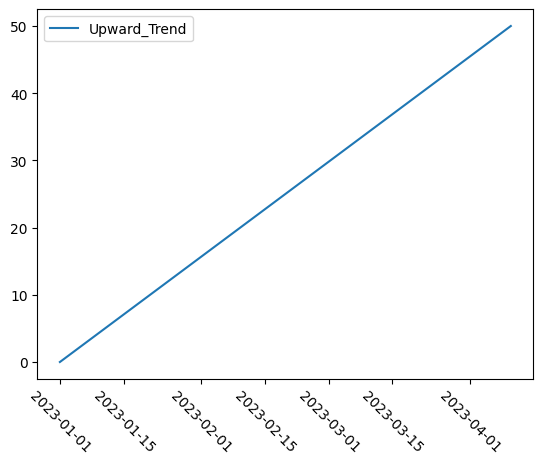

In [51]:
#상향 추세 시각화
data['Upward_Trend'] = np.linspace(0, 50, len(data))
#print(data)

plt.plot(data['Date'], data['Upward_Trend'], label="Upward_Trend")
plt.legend()
plt.xticks(rotation=-45)
plt.show()

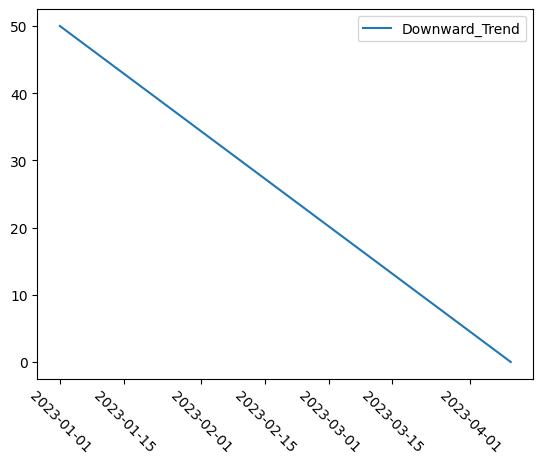

In [52]:
#하향 추세 시각화
data['Downward_Trend'] = np.linspace(50, 0, len(data))
#print(data)

plt.plot(data['Date'], data['Downward_Trend'], label="Downward_Trend")
plt.legend()
plt.xticks(rotation=-45)
plt.show()

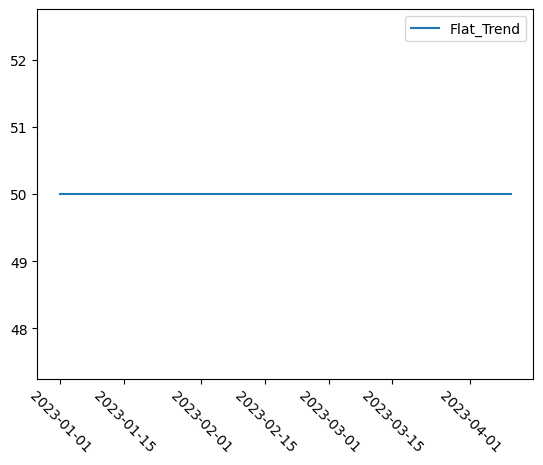

In [53]:
#평평한 추세 시각화
data['Flat_Trend'] = np.full(len(data), 50)
#print(data)

plt.plot(data['Date'], data['Flat_Trend'], label="Flat_Trend")
plt.legend()
plt.xticks(rotation=-45)
plt.show()

### *시계열 데이터 탐색 및 시각화*

#### 선그래프

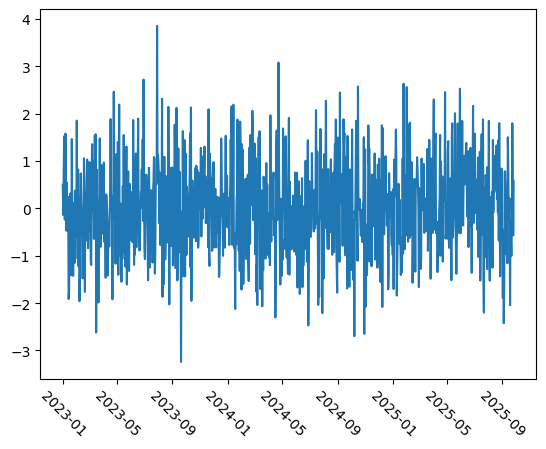

In [54]:
#시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

pd.set_option('display.max_row', 1000)

#시계열 데이터 시각화
plt.plot(data['Date'], data['Value'])
plt.xticks(rotation=-45)
plt.show()

#### 산점도 그래프

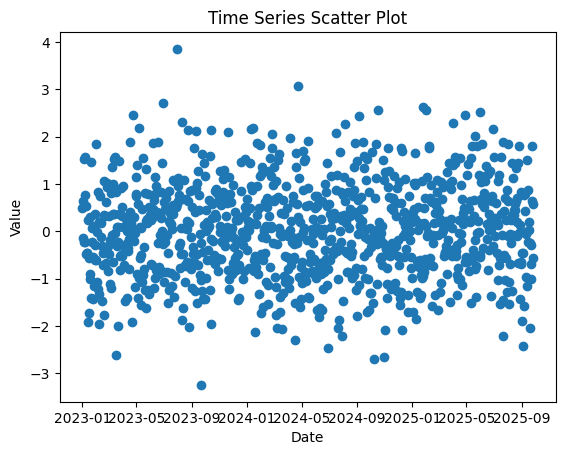

In [55]:
plt.scatter(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Scatter Plot')
plt.show()

#### 막대 그래프

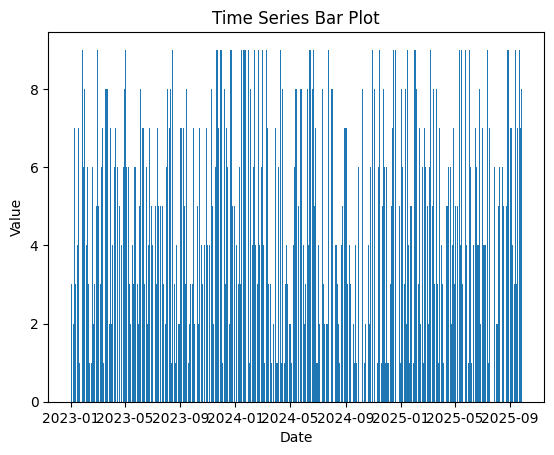

In [56]:
#시계열 데이터의 생성
np.random.seed(41)
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randint(0, 10, size=1000)

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

#시계열 데이터의 막대 그래프
plt.bar(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Bar Plot')
plt.show()

#### 박스 플롯

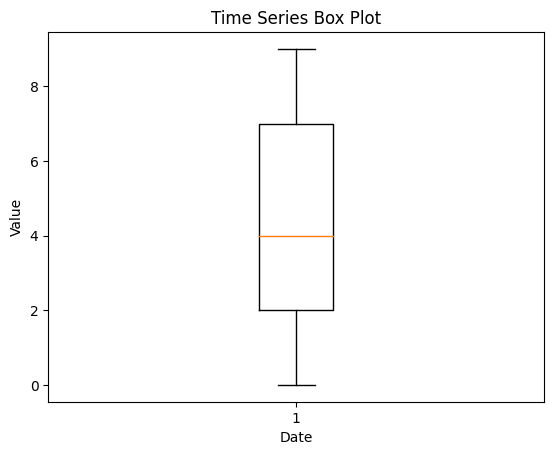

In [57]:
#시계열 데이터의 박스 플롯
plt.boxplot(data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Box Plot')
plt.show()

#### 히스토그램

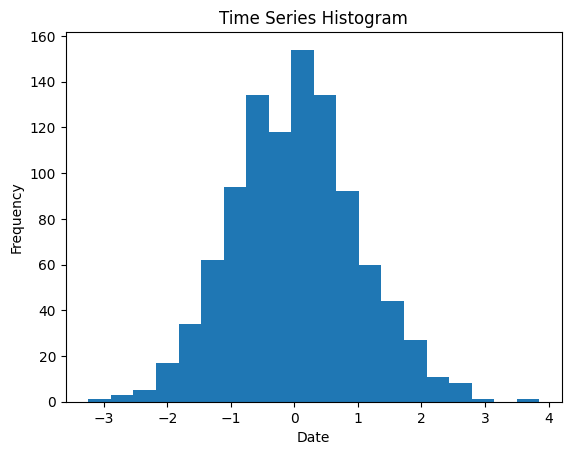

In [63]:
#시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

#시계열 데이터의 히스토그램
plt.hist(data['Value'], bins=20)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Time Series Histogram')
plt.show()

#### 히트맵

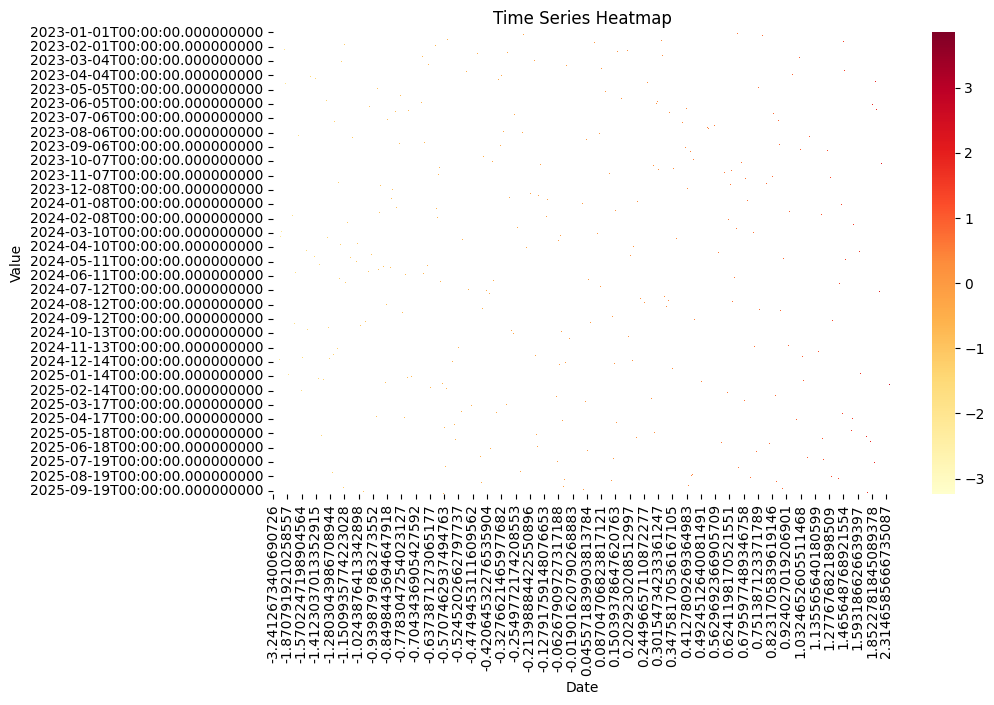

In [64]:
#데이터를 피벗 테이블로 변환
pivot_table = data.pivot(index='Date', columns='Value', values='Value')

#히트맵 시각화
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap='YlOrRd', cbar=True)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Heatmap')
plt.show()

In [65]:
# 피벗 테이블은 데이터를 특정 열을 기준으로 그룹화하여 요약하는 방법입니다.

# 예시)
# Date      value 
# 23-01-01    A
# 23-01-01    B
# 23-01-02    A
# 23-01-02    C
# 23-01-03    B
# 23-01-03    C

# 피벗 테이블 생성 
#           A   B   C 
# 23-01-01  A   B  NAN
# 23-01-02  A  NAN  C
# 23-01-03 NAN  B   C

### 시계열 분해

In [66]:
#시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100)

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

#print(data)

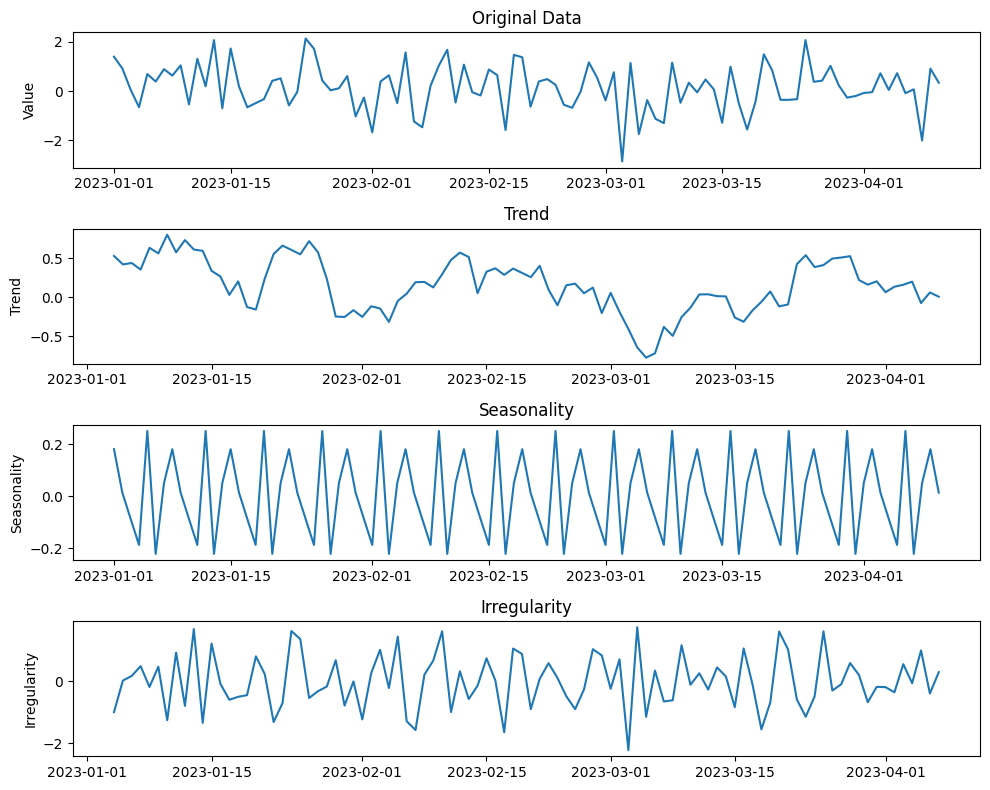

In [67]:
#시계열 분해
result = seasonal_decompose(data['Value'], model='additive', period=7)

#분해 결과 시각화
plt.figure(figsize=(10,8))

#원본 데이터
plt.subplot(4, 1, 1)
plt.plot(data['Date'], data['Value'])
plt.title('Original Data')
plt.ylabel('Value')

#추세(Trend)
plt.subplot(4, 1, 2)
plt.plot(data['Date'], result.trend)
plt.title('Trend')
plt.ylabel('Trend')

#계절성(Seasonality)
plt.subplot(4, 1, 3)
plt.plot(data['Date'], result.seasonal)
plt.title('Seasonality')
plt.ylabel('Seasonality')

#불규칙성(Irregularity)
plt.subplot(4, 1, 4)
plt.plot(data['Date'], result.resid)
plt.title('Irregularity')
plt.ylabel('Irregularity')

plt.tight_layout()
plt.show()